In [46]:
#Ryan Branagan
#Joseph Lannan
#Kaixin Song


#1st method, logistics map
#Inputs
x = 0.1
l = 4
N = 1000

def RandMap(x,mu,N):
  xs = np.zeros(N)
  xs[0] = x

  for i in range(len(xs)-1):
    xs[i+1] = mu*xs[i]*(1 - xs[i])
  
  rs = (1/np.pi)*np.arccos(1 - 2*xs)
  return xs,rs

[0.0078125 0.453125  0.8359375 ... 0.5546875 0.625     0.6328125]


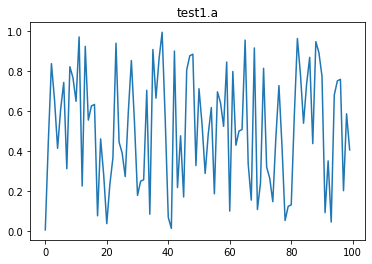

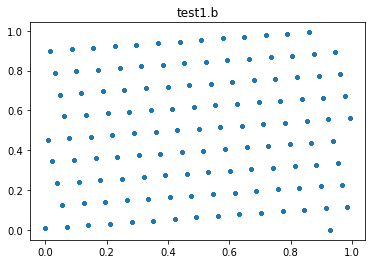

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


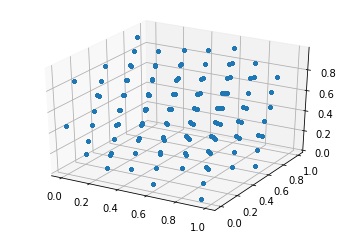

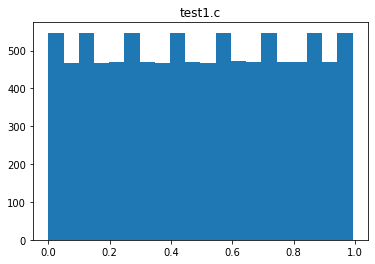

test2: 0.24626990425957407 0.07959160748964167 -0.0037751557314208706
test3: 2510.361328125


In [55]:
#2nd method, linear congruent mapping
import numpy as np
import matplotlib.pyplot as plt
def randomlincon(a,c,m, r0, itr):
  out = [r0]
  for i in range(0,itr):
    out.append((a*out[-1]+c)%m)
  out = np.divide(out,m)
  return out


#start tests
def moment(k, list):
  out = 0
  for i in list:
    out += i**k
  return out/len(list) - 1/4

def corrl(list):
  out = 0
  for i in range(0,len(list)-1):
    out += list[i]*list[i+1]
  np.divide(out,len(list))
  return out

#test 1.a:
a = randomlincon(57, 2, 256, 2, 10000)
plt.figure()
plt.title("test1.a")
print(a)
plt.plot(a[:100])
plt.show()

#test 1.b:
plt.figure()
plt.title("test1.b")
x = []
y = []
for i in range(0,len(a)-1):
  x.append(a[i])
  y.append(a[i+1])
plt.plot(x,y, marker =".",linestyle = "none")
plt.show()

#test 1.b.3.d:
plt.figure()
plt.title("test1.b.3.d")
x = []
y = []
z = []
for i in range(0,len(a)-2):
  x.append(a[i])
  y.append(a[i+1])
  z.append(a[i+2])
plt.axes(projection='3d')
plt.plot(x,y,z, marker =".", linestyle = "none")
plt.show()

#test 1.c:
plt.figure()
plt.title("test1.c")
plt.hist(a,20)
plt.show()

#test 2:
print("test2:",moment(1,a),moment(2,a),moment(3,a))

#test 3:
print("test3:",corrl(a))

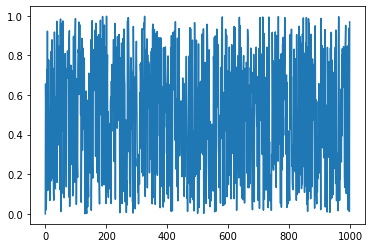

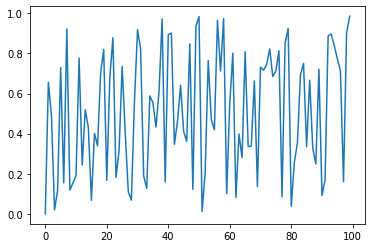

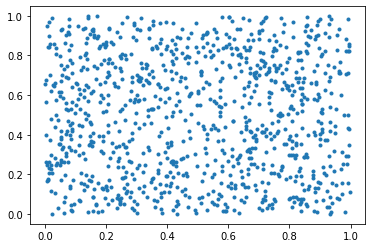

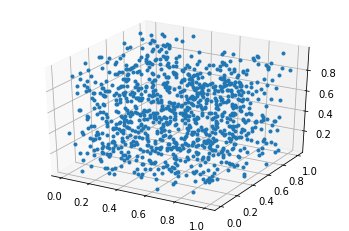

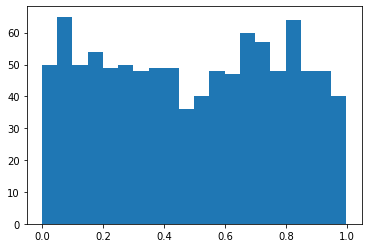

0.2416494591114226 0.07676081320457406 -0.006006945568324928
242.10895298337041


In [49]:
#3rd method, multiply with carry
import math
import matplotlib.pyplot as plt
import numpy as np

a=698769069
M=2**32-1
N=999
def method3(a,M,N):
  r=[]
  c=[]
  r0=123456
  c0=234567
  r.append(r0)
  c.append(c0)
  for i in range(N):
    c.append((a*r0+c0)%M)
    r.append((a*r0+c0)%M)
    c0=c[-1];
    r0=r[-1];
  c=np.multiply(c,1/M)
  r=np.multiply(r,1/M)
  return [r,c]
def method4(a,M,N):
  r=[]
  c=[]
  r0=123456
  c0=234567
  r.append(r0)
  c.append(c0)
  for i in range(N):
    c.append((a*r0+c0)%M)
    r.append((M-1)-(a*r0+c0)%M)
    c0=c[-1];
    r0=r[-1];
  c=np.multiply(c,1/M)
  r=np.multiply(r,1/M)
  return [r,c]


result=method3(a,M,N)
plt.plot(result[0])

#test 1.a:
a = result[1]
plt.figure()
#print(a)
plt.plot(a[:100])
plt.show()

#test 1.b:
plt.figure()
x = []
y = []
for i in range(0,len(a)-1):
  x.append(a[i])
  y.append(a[i+1])
plt.plot(x,y, marker =".",linestyle = "none")
plt.show()

#test 1.b.3d:
plt.figure()
x = []
y = []
z = []
for i in range(0,len(a)-2):
  x.append(a[i])
  y.append(a[i+1])
  z.append(a[i+2])
plt.axes(projection='3d')
plt.plot(x,y,z, marker =".",linestyle = "none")
plt.show()

#test 1.c:
plt.figure()
plt.hist(a,20)
plt.show()

#test 2:
print(moment(1,a),moment(2,a),moment(3,a))

#test 3:
print(corrl(a))



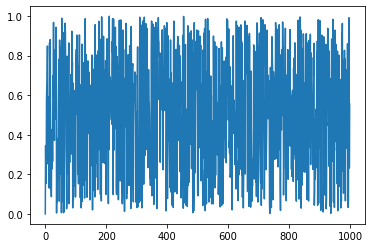

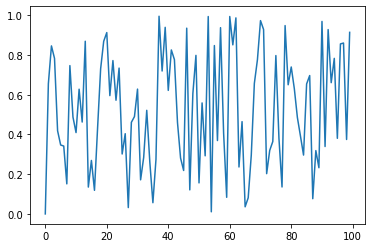

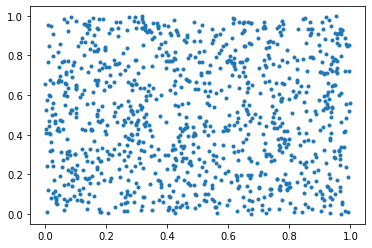

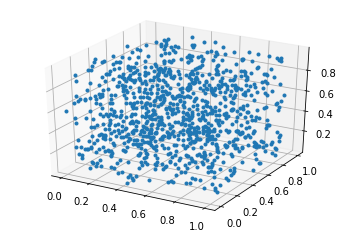

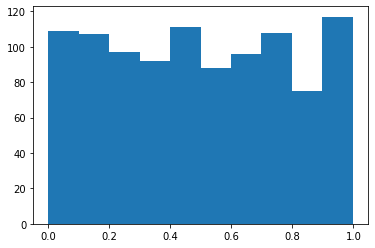

0.24276715706027252 0.07843997745621428 -0.0026969959136885213
244.30624567591832


In [42]:
#4th method, Complimentary multiply with carry
import math
import matplotlib.pyplot as plt
import numpy as np

a=698769069
M=2**32-1
N=999
def method4(a,M,N):
  r=[]
  c=[]
  r0=123456
  c0=123456
  r.append(r0)
  c.append(c0)
  for i in range(N):
    c.append((a*r0+c0)%M)
    r.append((M-1)-(a*r0+c0)%M)
    c0=c[-1];
    r0=r[-1];
  c=np.multiply(c,1/M)
  r=np.multiply(r,1/M)
  return [r,c]
result=method4(a,M,N)
plt.plot(result[0])

#test 1.a:
a = result[1]
plt.figure()
#print(a)
plt.plot(a[:100])
plt.show()

#test 1.b:
plt.figure()
x = []
y = []
for i in range(0,len(a)-1):
  x.append(a[i])
  y.append(a[i+1])
plt.plot(x,y, marker =".",linestyle = "none")
plt.show()

#test 1.b.3d:
plt.figure()
x = []
y = []
z = []
for i in range(0,len(a)-2):
  x.append(a[i])
  y.append(a[i+1])
  z.append(a[i+2])
plt.axes(projection='3d')
plt.plot(x,y,z, marker =".",linestyle = "none")
plt.show()

#test 1.c:
plt.figure()
plt.hist(a)
plt.show()

#test 2:
print(moment(1,a),moment(2,a),moment(3,a))

#test 3:
print(corrl(a))